## Exploratory Analysis_Mulvariate_2
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv
/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather.csv
/kaggle/input/noaa-weather-data-jfk-airport/README.txt
/kaggle/input/noaa-weather-data-jfk-airport/LICENSE.txt
/kaggle/input/noaa-weather-data-jfk-airport/clean_data.py


### Let's check 1st file: /kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv

In [3]:
df = pd.read_csv('/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv', delimiter=',')
df.dataframeName = 'jfk_weather_cleaned.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 75119 rows and 16 columns


In [4]:
df.head(10)

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.00,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000e+00,0,1,0
1,2010-01-01 02:00:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000e+00,0,1,0
2,2010-01-01 03:00:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000e+00,0,1,0
3,2010-01-01 04:00:00,5.00,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000e+00,0,1,0
4,2010-01-01 05:00:00,5.00,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000e+00,0,1,0
5,2010-01-01 06:00:00,5.00,33.0,32.0,31.0,92.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000e+00,0,1,0
6,2010-01-01 07:00:00,4.00,33.0,33.0,32.0,96.0,0.0,29.94,29.96,0.00,29.96,0.000000,1.000000e+00,0,1,0
7,2010-01-01 08:00:00,1.25,33.0,33.0,32.0,96.0,3.0,29.93,29.95,0.00,29.95,-1.000000,-1.836970e-16,0,1,0
8,2010-01-01 09:00:00,2.50,34.0,33.0,32.0,92.0,3.0,29.92,29.94,0.00,29.94,-0.939693,-3.420200e-01,0,1,0
9,2010-01-01 10:00:00,2.50,35.0,34.0,32.0,89.0,6.0,29.91,29.93,0.00,29.93,-0.939693,-3.420200e-01,0,1,0


In [5]:
df.index = pd.to_datetime(df["DATE"], format='%Y.%m.%d %H:%M:%S')

In [6]:
df.head(5)

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
DATE,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
2010-01-01 02:00:00,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2010-01-01 03:00:00,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
2010-01-01 04:00:00,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
2010-01-01 05:00:00,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [7]:
df_2 = df.drop('DATE', axis = 1)

In [8]:
df_2.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


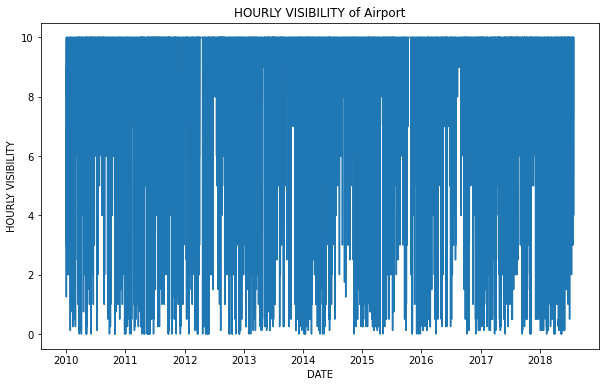

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(df_2['HOURLYVISIBILITY'])
plt.title('HOURLY VISIBILITY of Airport')
plt.ylabel('HOURLY VISIBILITY')
plt.xlabel('DATE')
plt.show()

To see The plot of 60 data

In [10]:
temp = df_2[:60]

In [11]:
temp.count()

HOURLYVISIBILITY              60
HOURLYDRYBULBTEMPF            60
HOURLYWETBULBTEMPF            60
HOURLYDewPointTempF           60
HOURLYRelativeHumidity        60
HOURLYWindSpeed               60
HOURLYStationPressure         60
HOURLYSeaLevelPressure        60
HOURLYPrecip                  60
HOURLYAltimeterSetting        60
HOURLYWindDirectionSin        60
HOURLYWindDirectionCos        60
HOURLYPressureTendencyIncr    60
HOURLYPressureTendencyDecr    60
HOURLYPressureTendencyCons    60
dtype: int64

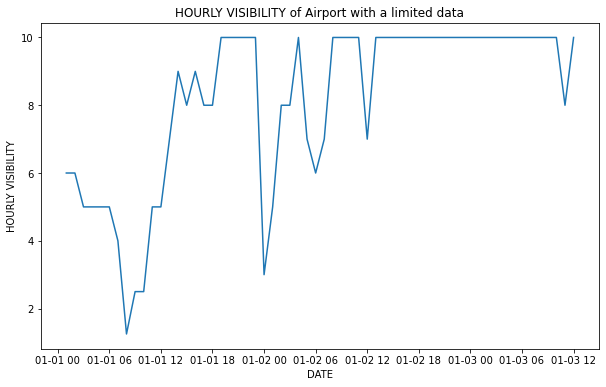

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(temp['HOURLYVISIBILITY'])
plt.title('HOURLY VISIBILITY of Airport with a limited data')
plt.ylabel('HOURLY VISIBILITY')
plt.xlabel('DATE')
plt.show()

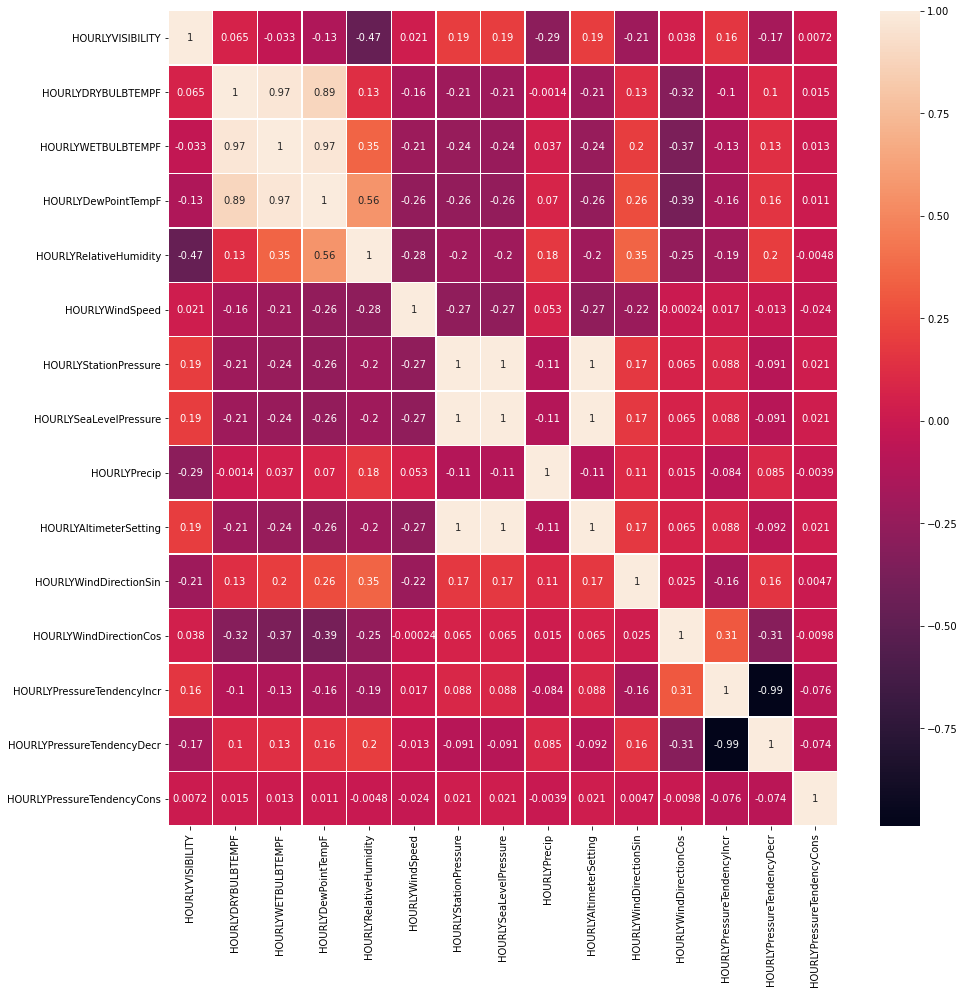

In [13]:
import seaborn as sns
corr = df_2.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [14]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(df_2, 0.8)
len(set(corr_features))

5

In [16]:
corr_features

{'HOURLYAltimeterSetting',
 'HOURLYDewPointTempF',
 'HOURLYPressureTendencyDecr',
 'HOURLYSeaLevelPressure',
 'HOURLYWETBULBTEMPF'}

In [17]:
df_3 = df_2.drop(corr_features,axis=1)

In [18]:
df_3.columns

Index(['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYRelativeHumidity',
       'HOURLYWindSpeed', 'HOURLYStationPressure', 'HOURLYPrecip',
       'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
       'HOURLYPressureTendencyIncr', 'HOURLYPressureTendencyCons'],
      dtype='object')

In [19]:
len(set(df_3))

10

In [20]:
def df_to_X_y2(df, window_size=3):
  df_as_np = df_3.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [21]:
X2, y2 = df_to_X_y2(df_3)
X2.shape, y2.shape

((75116, 3, 10), (75116,))

In [22]:
X_train2, y_train2 = X2[:70000], y2[:70000]
X_val2, y_val2 = X2[70000:73000], y2[70000:73000]
X_test2, y_test2 = X2[73000:], y2[73000:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((70000, 3, 10), (70000,), (3000, 3, 10), (3000,), (2116, 3, 10), (2116,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [24]:
temp_training_mean = np.mean(X_train2[:, :, 0])
temp_training_std = np.std(X_train2[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [25]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

array([[[  0.35628296,  52.        ,  59.        , ...,   0.766044  ,
           0.        ,   1.        ],
        [  0.35628296,  50.        ,  63.        , ...,   0.866025  ,
           0.        ,   1.        ],
        [  0.35628296,  50.        ,  63.        , ...,   0.866025  ,
           1.        ,   0.        ]],

       [[  0.35628296,  50.        ,  63.        , ...,   0.866025  ,
           0.        ,   1.        ],
        [  0.35628296,  50.        ,  63.        , ...,   0.866025  ,
           1.        ,   0.        ],
        [  0.35628296,  50.        ,  61.        , ...,   0.984808  ,
           1.        ,   0.        ]],

       [[  0.35628296,  50.        ,  63.        , ...,   0.866025  ,
           1.        ,   0.        ],
        [  0.35628296,  50.        ,  61.        , ...,   0.984808  ,
           1.        ,   0.        ],
        [  0.35628296,  50.        ,  63.        , ...,   0.984808  ,
           1.        ,   0.        ]],

       ...,

       [[

In [26]:
model1 = Sequential()
model1.add(InputLayer((3, 10)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                19200     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 19,729
Trainable params: 19,729
Non-trainable params: 0
_________________________________________________________________


In [27]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [28]:
History_1 = model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=300, callbacks=[cp1])

Epoch 1/300
2188/2188 [==============================] - 11s 5ms/step - loss: 16.0106 - root_mean_squared_error: 4.0013 - val_loss: 3.2986 - val_root_mean_squared_error: 1.8162
Epoch 2/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.7142 - root_mean_squared_error: 1.3093 - val_loss: 1.7600 - val_root_mean_squared_error: 1.3266
Epoch 3/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.3444 - root_mean_squared_error: 1.1595 - val_loss: 1.5011 - val_root_mean_squared_error: 1.2252
Epoch 4/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2016 - root_mean_squared_error: 1.0962 - val_loss: 1.2344 - val_root_mean_squared_error: 1.1110
Epoch 5/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.1420 - root_mean_squared_error: 1.0686 - val_loss: 1.2048 - val_root_mean_squared_error: 1.0976
Epoch 6/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.1172 - root_mean_squared_error: 1.0570 

In [29]:
History_1.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

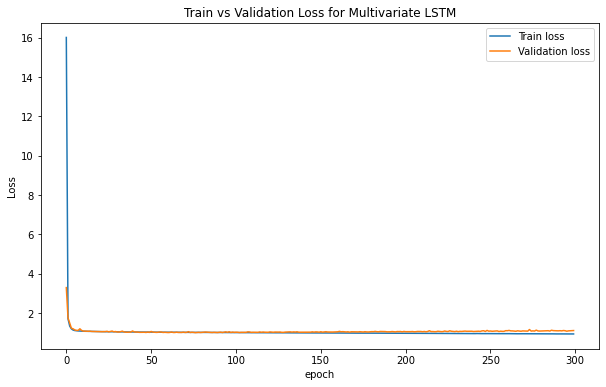

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(History_1.history['loss'])
plt.plot(History_1.history['val_loss'])
plt.title('Train vs Validation Loss for Multivariate LSTM')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [31]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [32]:
train_predictions_1 = model1.predict(X_train2).flatten()
train_results_1 = pd.DataFrame(data={'Train Predictions':train_predictions_1, 'Actuals':y_train2})
train_results_1.head(10)

,Train Predictions,Actuals
0,4.576786,5.00
1,4.694749,5.00
2,4.938712,5.00
3,4.824621,4.00
4,3.584812,1.25
5,1.462096,2.50
6,3.854106,2.50
7,3.998272,5.00
8,6.568491,5.00
9,5.817013,7.00


In [33]:
train_results_1.columns

Index(['Train Predictions', 'Actuals'], dtype='object')

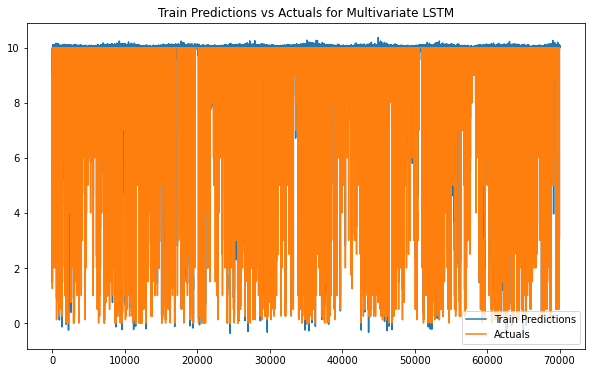

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_1['Train Predictions'])
plt.plot(train_results_1['Actuals'])
plt.title('Train Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [35]:
rms = sqrt(mean_squared_error(y_train2, train_predictions_1))
rms

1.007723974198602

To see limited train results

In [36]:
train_results_minimize = train_results_1[100:300]

In [37]:
train_results_minimize.shape

(200, 2)

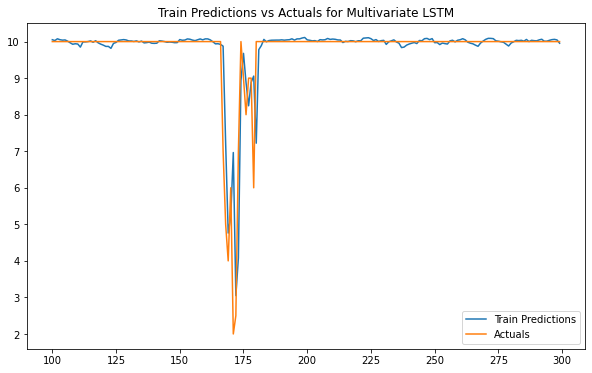

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_minimize['Train Predictions'])
plt.plot(train_results_minimize['Actuals'])
plt.title('Train Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [39]:
val_predictions_1 = model1.predict(X_val2).flatten()
val_results_1 = pd.DataFrame(data={'Val Predictions':val_predictions_1, 'Actuals':y_val2})
val_results_1.head(10)

,Val Predictions,Actuals
0,10.091971,10.0
1,10.078211,10.0
2,10.047048,10.0
3,10.037448,10.0
4,10.025843,10.0
5,10.007851,10.0
6,10.008531,10.0
7,9.997514,10.0
8,10.049090,10.0
9,10.051971,10.0


In [40]:
val_results_1.shape

(3000, 2)

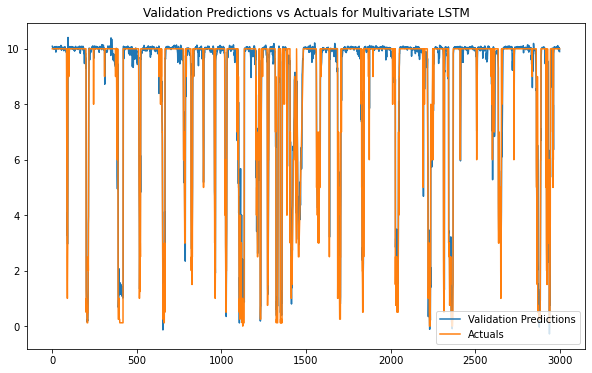

In [41]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_1['Val Predictions'])
plt.plot(val_results_1['Actuals'])
plt.title('Validation Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [42]:
rms = sqrt(mean_squared_error(y_val2, val_predictions_1))
rms

1.0053616549026527

To see limited validation data

In [43]:
val_results_minimize = val_results_1[100:300]

In [44]:
val_results_minimize.shape

(200, 2)

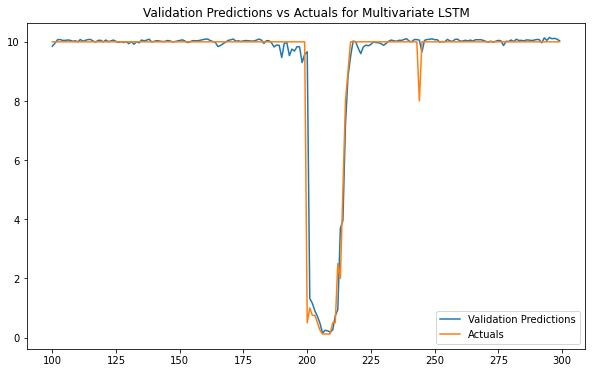

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_minimize['Val Predictions'])
plt.plot(val_results_minimize['Actuals'])
plt.title('Validation Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [46]:
test_predictions_1 = model1.predict(X_test2).flatten()
test_results_1 = pd.DataFrame(data={'Test Predictions':test_predictions_1, 'Actuals':y_test2})
test_results_1.head(10)

,Test Predictions,Actuals
0,10.030365,10.0
1,10.097680,10.0
2,10.078977,10.0
3,10.079633,10.0
4,10.053268,10.0
5,10.033111,10.0
6,10.045896,10.0
7,10.067628,10.0
8,10.067336,10.0
9,10.082264,10.0


In [47]:
test_results_1.shape

(2116, 2)

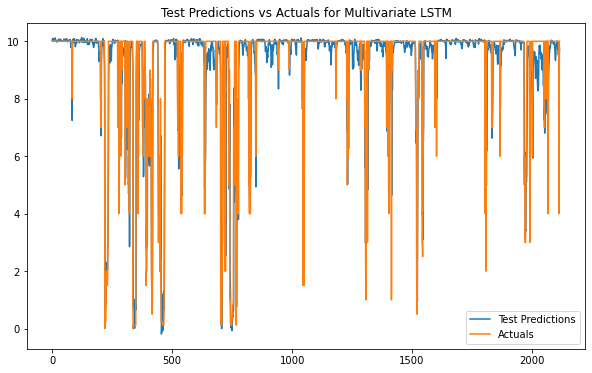

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_1['Test Predictions'])
plt.plot(test_results_1['Actuals'])
plt.title('Test Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [49]:
rms = sqrt(mean_squared_error(y_test2, test_predictions_1))
rms

1.1555932345489488

To see limited test results

In [50]:
test_results_minimize = test_results_1[100:300]

In [51]:
test_results_minimize.shape

(200, 2)

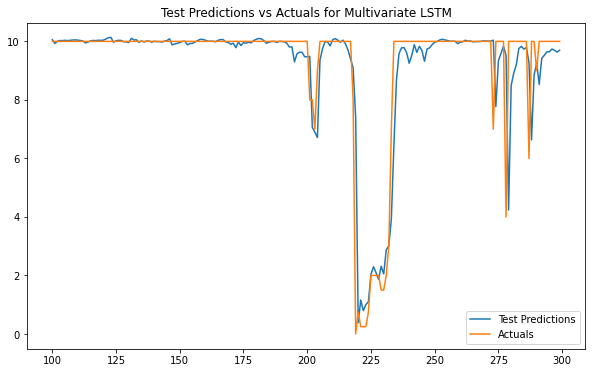

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_minimize['Test Predictions'])
plt.plot(test_results_minimize['Actuals'])
plt.title('Test Predictions vs Actuals for Multivariate LSTM')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [53]:
model2 = Sequential()
model2.add(InputLayer((3, 10)))
model2.add(GRU(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                14592     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 15,121
Trainable params: 15,121
Non-trainable params: 0
_________________________________________________________________


In [54]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [55]:
History_2 = model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=300, callbacks=[cp2])

Epoch 1/300
2188/2188 [==============================] - 11s 5ms/step - loss: 8.7083 - root_mean_squared_error: 2.9510 - val_loss: 2.7309 - val_root_mean_squared_error: 1.6525
Epoch 2/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.4838 - root_mean_squared_error: 1.2181 - val_loss: 1.7214 - val_root_mean_squared_error: 1.3120
Epoch 3/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.2506 - root_mean_squared_error: 1.1183 - val_loss: 1.3879 - val_root_mean_squared_error: 1.1781
Epoch 4/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.1745 - root_mean_squared_error: 1.0838 - val_loss: 1.2733 - val_root_mean_squared_error: 1.1284
Epoch 5/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.1430 - root_mean_squared_error: 1.0691 - val_loss: 1.2439 - val_root_mean_squared_error: 1.1153
Epoch 6/300
2188/2188 [==============================] - 10s 5ms/step - loss: 1.1253 - root_mean_squared_error: 1.0608 -

In [56]:
History_2.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

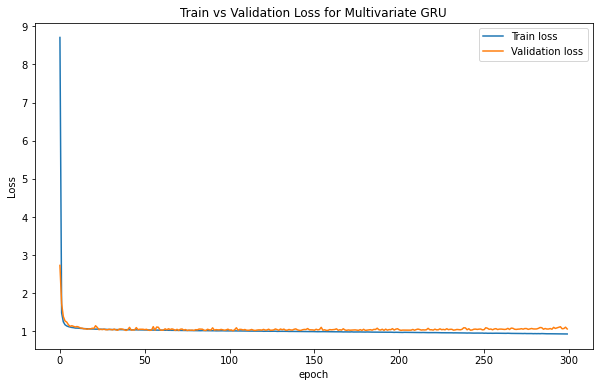

In [57]:
plt.figure(figsize = (10, 6))
plt.plot(History_2.history['loss'])
plt.plot(History_2.history['val_loss'])
plt.title('Train vs Validation Loss for Multivariate GRU')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [58]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [59]:
train_predictions_2 = model2.predict(X_train2).flatten()
train_results_2 = pd.DataFrame(data={'Train Predictions':train_predictions_2, 'Actuals':y_train2})
train_results_2.head(10)

,Train Predictions,Actuals
0,4.248763,5.00
1,4.409527,5.00
2,4.624461,5.00
3,4.591583,4.00
4,3.254636,1.25
5,0.825373,2.50
6,3.652932,2.50
7,4.107409,5.00
8,6.432442,5.00
9,5.072638,7.00


In [60]:
train_results_2.shape

(70000, 2)

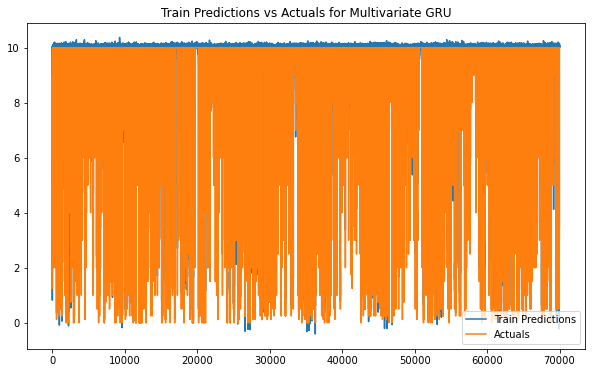

In [61]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_2['Train Predictions'])
plt.plot(train_results_2['Actuals'])
plt.title('Train Predictions vs Actuals for Multivariate GRU')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [62]:
rms = sqrt(mean_squared_error(y_train2, train_predictions_2))
rms

1.0038558364251036

To see limited train results

In [63]:
train_results_minimize = train_results_2[100:300]

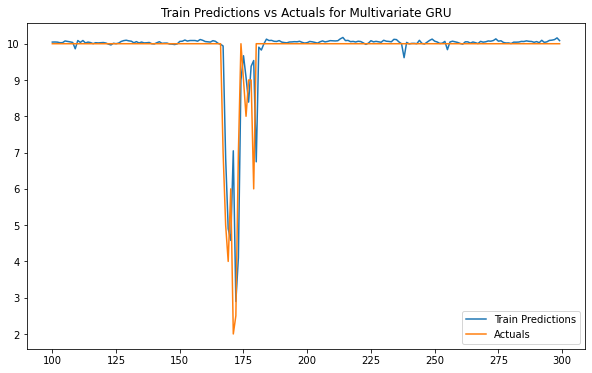

In [64]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_minimize['Train Predictions'])
plt.plot(train_results_minimize['Actuals'])
plt.title('Train Predictions vs Actuals for Multivariate GRU')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [65]:
val_predictions_2 = model2.predict(X_val2).flatten()
val_results_2 = pd.DataFrame(data={'Val Predictions':val_predictions_2, 'Actuals':y_val2})
val_results_2.head(10)

,Val Predictions,Actuals
0,10.074902,10.0
1,10.137483,10.0
2,10.133756,10.0
3,10.107757,10.0
4,10.139519,10.0
5,10.091247,10.0
6,10.079509,10.0
7,10.090989,10.0
8,10.109452,10.0
9,10.059152,10.0


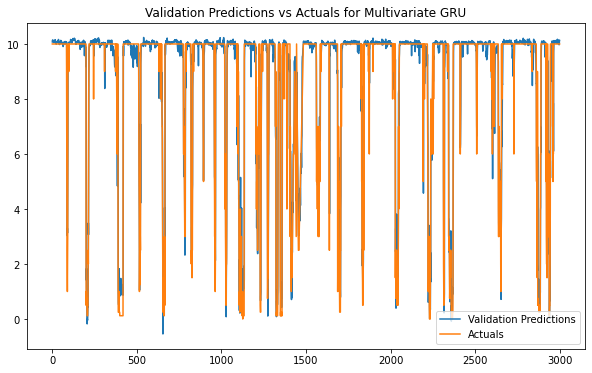

In [66]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_2['Val Predictions'])
plt.plot(val_results_2['Actuals'])
plt.title('Validation Predictions vs Actuals for Multivariate GRU')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [67]:
rms = sqrt(mean_squared_error(y_val2, val_predictions_2))
rms

1.0080361131035878

To see limited validation result

In [68]:
val_results_minimize = val_results_2[100:300]

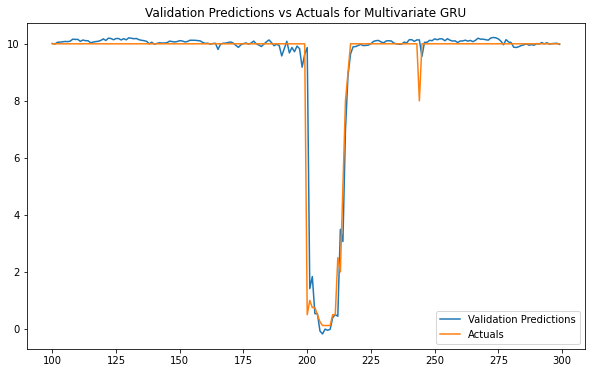

In [69]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_minimize['Val Predictions'])
plt.plot(val_results_minimize['Actuals'])
plt.title('Validation Predictions vs Actuals for Multivariate GRU')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [70]:
test_predictions_2 = model2.predict(X_test2).flatten()
test_results_2 = pd.DataFrame(data={'Test Predictions':test_predictions_2, 'Actuals':y_test2})
test_results_2.head(10)

,Test Predictions,Actuals
0,10.184450,10.0
1,10.151487,10.0
2,10.148798,10.0
3,10.142370,10.0
4,10.122737,10.0
5,10.095084,10.0
6,10.065983,10.0
7,10.070086,10.0
8,10.073681,10.0
9,10.092885,10.0


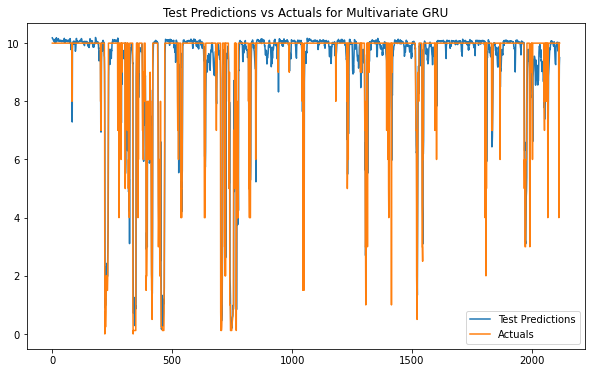

In [71]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_2['Test Predictions'])
plt.plot(test_results_2['Actuals'])
plt.title('Test Predictions vs Actuals for Multivariate GRU')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [72]:
rms = sqrt(mean_squared_error(y_test2, test_predictions_2))
rms

1.1390294391101632

To see limited test results

In [73]:
test_results_minimize = test_results_2[100:300]

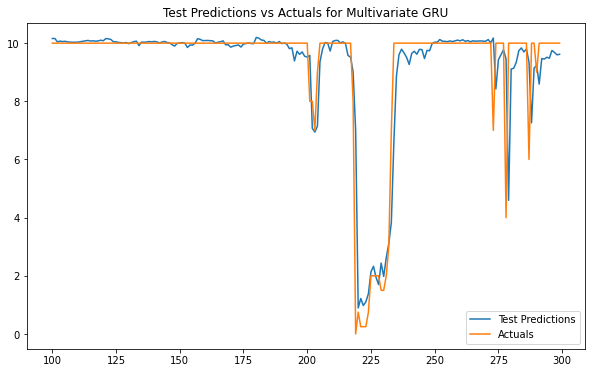

In [74]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_minimize['Test Predictions'])
plt.plot(test_results_minimize['Actuals'])
plt.title('Test Predictions vs Actuals for Multivariate GRU')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')